In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from numpy import random
from numpy import matlib
import matplotlib.pyplot as plt
import matplotlib
import math
# https://pypi.python.org/pypi/haversine
from haversine import haversine

from Problem import * 
from SA import *

import time


In [2]:
gifts = pd.read_csv('gifts.csv')
sample_submission= pd.read_csv('sample_submission.csv') 

# Test function

In [11]:
def test(range_gift_num, mask_methods=[True]*5, 
         labels=['column_generation_10_01', 'column_generation_50_02', 'greedy_distance', 'greedy_wdistance', 'sample_submission', 'random'], 
         shuffle=True):
    
    time_list=[]
    objective_list=[]
    
    labels=np.array(labels)[mask_methods]
    
    if shuffle: gifts_shuffle=gifts.sample(frac=1)
    else: gifts_shuffle=gifts
    
    for  gift_num in range_gift_num:
        
        problem=Problem(gifts_shuffle[:gift_num], None)
        
        
        def column_generation_50_02(): 
            return problem.solve_prime(n_sol_to_collect=50, gap=0.2, SA=False)
        
        def column_generation_10_01(): 
            return problem.solve_prime(n_sol_to_collect=10, gap=0.1, SA=False)
        
        #сюда вписать методы для сравнения, лейблы и маска передается в параметры функции test
        methods=np.array([column_generation_10_01, column_generation_50_02, problem.Greedy_solver, problem.Greedy_solver_deep, 
                          problem.one_gift_one_trip_solver, problem.Randomize_solver])
        methods=methods[mask_methods]
        t=one_test(problem, methods)
        objective_list.append(t[0])
        time_list.append(t[1])
        
    time_list, objective_list=np.array(time_list), np.array(objective_list)
    
    # objective
    plt.figure(figsize = (12,8))
    
    for i, m_obj in enumerate(objective_list.T):
        plt.plot(range_gift_num, m_obj, label = labels[i])
    
    #plt.plot(range_gift_num, ca_obj, label = 'simulated annealing')
    #plt.plot(range_gift_num, cg_obj, label = 'column generation')
    
    plt.xlabel("Number of gifts")
    plt.ylabel("objective")
    plt.legend()
    plt.show()
    
    # time
    plt.figure(figsize = (12,8))
    
    for i, m_time in enumerate(time_list.T):
        plt.semilogy(range_gift_num, m_time, label = labels[i])
    
    plt.xlabel("Number of gifts")
    plt.ylabel("Computational time")
    plt.legend()
    plt.show()
    
    return  objective_list, time_list 
    
    
def one_test(problem, method):

    time_data=[]
    objective_data=[]
    
    for m in method:
        
        time_start = time.clock()
        solution = m()
        time_elapsed = (time.clock() - time_start)
        objective=problem.objective(solution)
        time_data.append(time_elapsed)
        objective_data.append(objective)
        
        
    return objective_data,time_data
  

# Comparison of the algotithms 

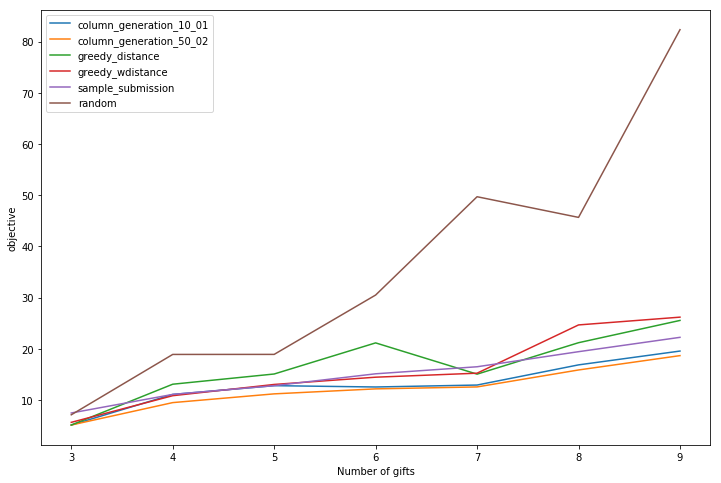

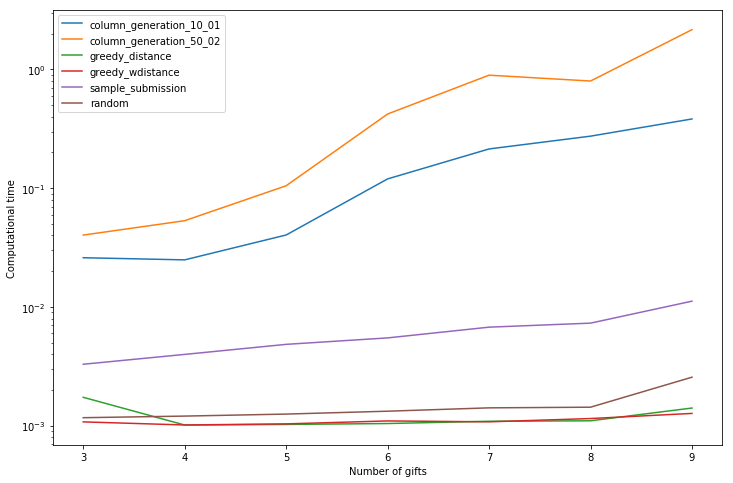

CPU times: user 6.88 s, sys: 32 ms, total: 6.91 s
Wall time: 6.78 s


In [13]:
%%time
objective_list, time_list  = test(range(3,10,1), mask_methods=[True, True, True, True, True, True], shuffle=True)

# Example of the colum generation handling - with greedy and SA subsolvers

In [4]:
%%time
N=10
problem=Problem(gifts[:N], sample_submission[sample_submission.GiftId<=N])
problem.solve_prime(n_sol_to_collect=10, gap=0.1)
print(problem.obj)

26.2556493415
CPU times: user 12.8 s, sys: 28 ms, total: 12.8 s
Wall time: 15.2 s


In [5]:
%%time
N=10
problem=Problem(gifts[:N], sample_submission[sample_submission.GiftId<=N])
problem.solve_prime(n_sol_to_collect=10, gap=0.1, SA=False)
print(problem.obj)

26.2556493415
CPU times: user 532 ms, sys: 4 ms, total: 536 ms
Wall time: 524 ms


# Make comparison of algorithms on 10, 20, 50, 100 gift dataset

# Importing some saved results from dataframes

In [25]:
cg_obj=[]
cg_labels=['column_generation']*4
for i, n in enumerate(['10', '20', '50', '100']):
    cg_labels[i]+=n
    problem=Problem(gifts[:int(n)], sample_submission=pd.read_csv(cg_labels[i], index_col=0))
    obj=problem.objective(problem.solution)
    cg_obj.append(obj)
    
cg_obj

[24.282794420658806,
 56.312263392361579,
 111.45655926709924,
 232.44178972085646]

In [26]:
ca_obj=[]
cg_labels=['sa_']*4
for i, n in enumerate(['10', '20', '50', '100']):
    cg_labels[i]=cg_labels[i]+n+'.csv'
    problem=Problem(gifts[:int(n)], sample_submission=pd.read_csv(cg_labels[i], index_col=0))
    obj=problem.objective(problem.solution)
    ca_obj.append(obj)
    
ca_obj

[23.306615902076786,
 47.042960637117865,
 76.603380881786833,
 146.32226116924556]

In [27]:
def test(range_gift_num, mask_methods=[True]*5, 
         labels=['column_generation_10_01', 'column_generation_50_02', 'greedy_distance', 'greedy_wdistance', 'sample_submission', 'random'], 
         shuffle=True):
    
    time_list=[]
    objective_list=[]
    
    labels=np.array(labels)[mask_methods]
    
    if shuffle: gifts_shuffle=gifts.sample(frac=1)
    else: gifts_shuffle=gifts
    
    for  gift_num in range_gift_num:
        
        problem=Problem(gifts_shuffle[:gift_num], None)
        
        
        def column_generation_50_02(): 
            return problem.solve_prime(n_sol_to_collect=50, gap=0.2, SA=False)
        
        def column_generation_10_01(): 
            return problem.solve_prime(n_sol_to_collect=10, gap=0.1, SA=False)
        
        #сюда вписать методы для сравнения, лейблы и маска передается в параметры функции test
        methods=np.array([column_generation_10_01, column_generation_50_02, problem.Greedy_solver, problem.Greedy_solver_deep, 
                          problem.one_gift_one_trip_solver, problem.Randomize_solver])
        methods=methods[mask_methods]
        t=one_test(problem, methods)
        objective_list.append(t[0])
        time_list.append(t[1])
        
    time_list, objective_list=np.array(time_list), np.array(objective_list)
    
    # objective
    plt.figure(figsize = (12,8))
    
    for i, m_obj in enumerate(objective_list.T):
        plt.plot(range_gift_num, m_obj, label = labels[i])
    
    plt.plot(range_gift_num, ca_obj, label = 'simulated annealing')
    plt.plot(range_gift_num, cg_obj, label = 'column generation')
    
    plt.xlabel("Number of gifts")
    plt.ylabel("objective")
    plt.legend()
    plt.show()
    
    # time
    plt.figure(figsize = (12,8))
    
    for i, m_time in enumerate(time_list.T):
        plt.semilogy(range_gift_num, m_time, label = labels[i])
    
    plt.xlabel("Number of gifts")
    plt.ylabel("Computational time")
    plt.legend()
    plt.show()
    
    return  objective_list, time_list 
    
    
def one_test(problem, method):

    time_data=[]
    objective_data=[]
    
    for m in method:
        
        time_start = time.clock()
        solution = m()
        time_elapsed = (time.clock() - time_start)
        objective=problem.objective(solution)
        time_data.append(time_elapsed)
        objective_data.append(objective)
        
        
    return objective_data,time_data
  

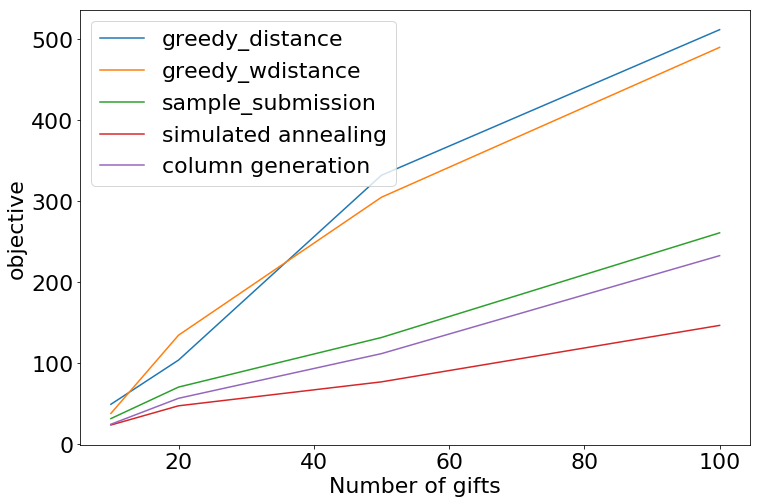

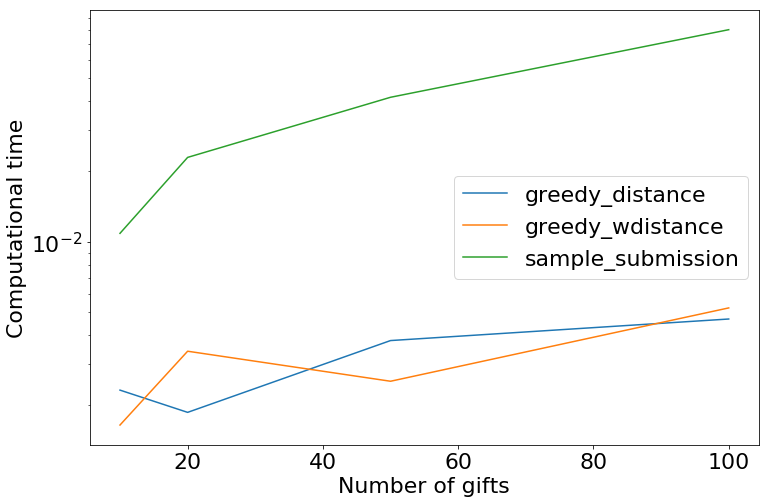

In [30]:
objective_list, time_list =test([10,20,50,100], [False, False, True, True, True, False], shuffle=False)

# Testing onetrip solvers

In [19]:
def Make_test(gift_num, N):

        
    problem=Problem(gifts[:gift_num], None)
    
    knapsack=problem.solve_knapsack(np.ones(problem.N-1), n_sol_to_collect=1, n_var=N)[0]
    
    rand_time_start = time.clock()
    rand_solution = problem.solve_one_trip_sa(knapsack)
    rand_time_elapsed = (time.clock() - rand_time_start)
    
    
    greed_time_start = time.clock()
    greed_solution = problem.solve_onetrip_greedy(knapsack)
    greed_time_elapsed = (time.clock() - greed_time_start)

    greedd_time_start = time.clock()
    deep_greed_solution = problem.solve_onetrip_greedy_deep(knapsack)
    greedd_time_elapsed = (time.clock() - greedd_time_start)
    
    total_comp_time = rand_time_elapsed+greed_time_elapsed+greedd_time_elapsed
    
    #print("Complete with ", gift_num, "in ",  total_comp_time, "sec")
    
    sol = np.array([problem.weighted_onetrip_weariness(rand_solution), problem.weighted_onetrip_weariness(greed_solution), problem.weighted_onetrip_weariness(deep_greed_solution)])
    times = np.array([rand_time_elapsed, greed_time_elapsed, greedd_time_elapsed])
    
    return sol,times

In [20]:
def vis(objs,times):
    
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.figure(figsize = (12,8))
    

    plt.plot(number_of_gifts_array, objs[:,1], label = "distance greed", color = "blue", linewidth = "5")
    plt.plot(number_of_gifts_array, objs[:,2], label = "weighted distance greed", color = "green", linewidth = "5")
    plt.plot(number_of_gifts_array, objs[:,0], label = "SA", color = "red", linewidth = "5")
    
    plt.xlabel("Number of gifts")
    plt.ylabel("obj")
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize = (12,8))
    

    plt.semilogy(number_of_gifts_array, times[:,1], label = "distance greed", color = "blue", linewidth = "5")
    plt.semilogy(number_of_gifts_array, times[:,2], label = "weighted distance greed", color = "green", linewidth = "5")
    plt.semilogy(number_of_gifts_array, times[:,0], label = "SA", color = "red", linewidth = "5")
    
    plt.xlabel("Number of gifts")
    plt.ylabel("Computational time")
    plt.legend()
    plt.show()

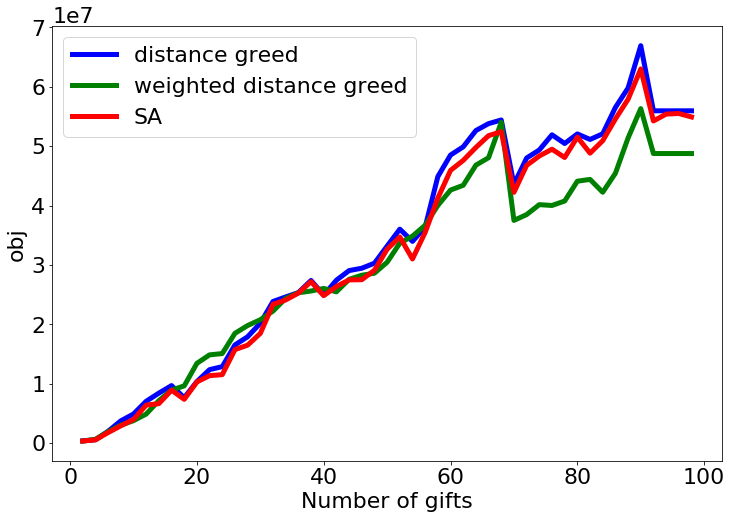

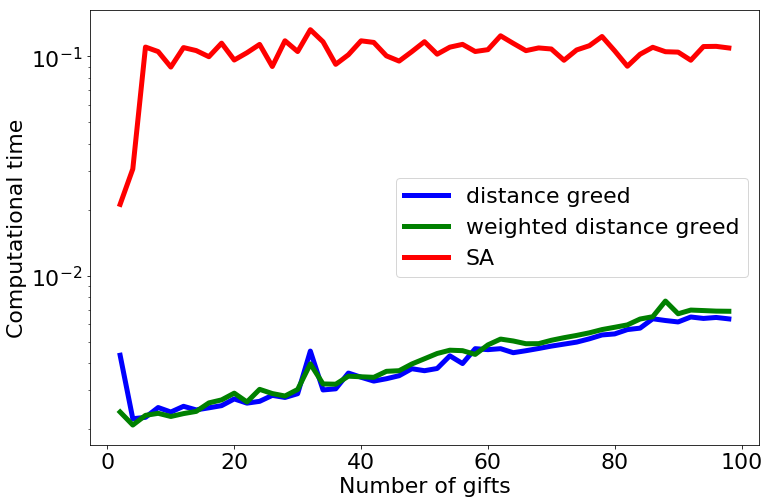

In [22]:
number_of_gifts_array = np.array(list(range(2,100,2)))

objs = np.zeros([number_of_gifts_array.shape[0], 3])
times = np.zeros([number_of_gifts_array.shape[0], 3])


for i, n in enumerate(number_of_gifts_array):
    
    objs[i,:],times[i,:] = Make_test(100, n)
    
    
vis(objs,times)